<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Dataset

<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição do conjunto de dados:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste exercício será criar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [4]:
dados = pd.read_csv('FuelConsumptionCo2.csv', sep=',')

## Visualizar os dados

In [5]:
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Verificando o tamanho do dataset

In [6]:
dados.shape

(1067, 13)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [8]:
dados.corr().round(3)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000,0.934,0.832,0.779,0.819,-0.809,0.874
CYLINDERS,NaN,0.934,1.000,0.796,0.725,0.777,-0.770,0.850
FUELCONSUMPTION_CITY,NaN,0.832,0.796,1.000,0.966,0.996,-0.936,0.898
FUELCONSUMPTION_HWY,NaN,0.779,0.725,0.966,1.000,0.986,-0.894,0.862
FUELCONSUMPTION_COMB,NaN,0.819,0.777,0.996,0.986,1.000,-0.928,0.892
FUELCONSUMPTION_COMB_MPG,NaN,-0.809,-0.770,-0.936,-0.894,-0.928,1.000,-0.906
CO2EMISSIONS,NaN,0.874,0.850,0.898,0.862,0.892,-0.906,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y) - Target</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

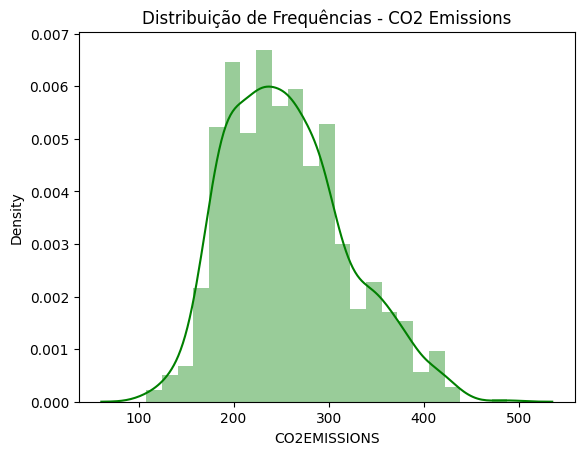

In [9]:
# prompt: histograma da coluna 'consumo'

sns.distplot(dados['CO2EMISSIONS'], color='green')
plt.title('Distribuição de Frequências - CO2 Emissions')
plt.show()


In [11]:
# prompt: padronize a coluna 'consumo' de -10 a 10 com Standard Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados['CO2EMISSIONS'] = scaler.fit_transform(dados['CO2EMISSIONS'].values.reshape(-1, 1))

# Verificando os dados
dados.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,-0.950840
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,-0.556161
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,-1.898070
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,-0.019397
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,-0.193056


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='CO2EMISSIONS', ylabel='Emissão de CO2'>

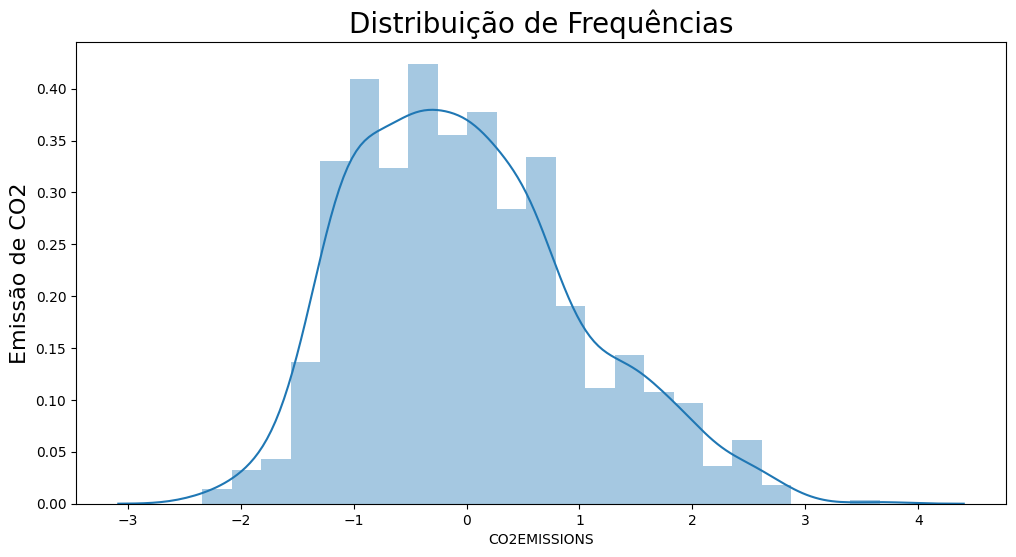

In [13]:
# Gerando um histograma para a coluna "consumo"
ax = sns.distplot(dados['CO2EMISSIONS'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Emissão de CO2', fontsize=16)

ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [ ]:
# ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

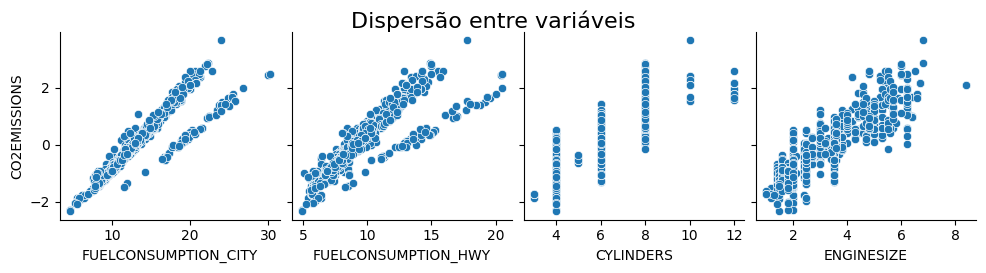

In [19]:
# Eixo y: Variável Dependente
# Eixo X: Variáveis Independentes.
ax = sns.pairplot(dados, y_vars='CO2EMISSIONS', x_vars=['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.05)
ax


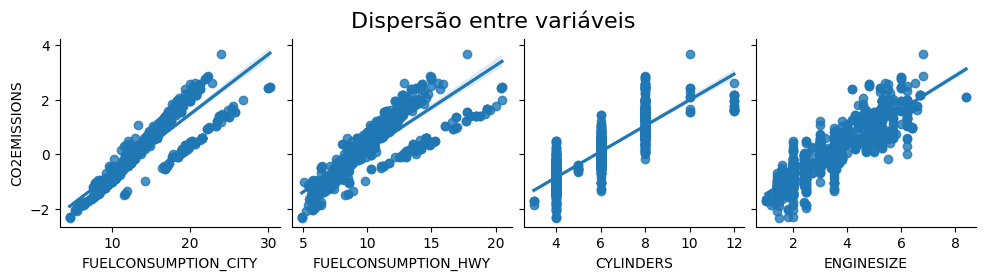

In [20]:
# Estimando a reta de regressão com "reg".
ax = sns.pairplot(dados, y_vars='CO2EMISSIONS', x_vars=['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [16]:
# Variável dependente y
y = dados['CO2EMISSIONS']
y

0      -0.950840
1      -0.556161
2      -1.898070
3      -0.019397
4      -0.193056
          ...   
1062    0.233197
1063    0.122687
1064    0.233197
1065    0.059538
1066    0.596302
Name: CO2EMISSIONS, Length: 1067, dtype: float64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [21]:
X = dados[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE']]
X

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
0,9.9,6.7,4,2.0
1,11.2,7.7,4,2.4
2,6.0,5.8,4,1.5
3,12.7,9.1,6,3.5
4,12.1,8.7,6,3.5
...,...,...,...,...
1062,13.4,9.8,6,3.0
1063,13.2,9.5,6,3.2
1064,13.4,9.8,6,3.0
1065,12.9,9.3,6,3.2


## Criando os datasets de treino e de teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
69,18.8,11.5,12,6.0
697,9.3,7.6,4,2.0
705,8.4,6.1,4,2.5
521,11.6,9.3,4,2.4
474,23.3,16.1,8,6.2
...,...,...,...,...
847,9.3,7.9,4,1.6
715,8.8,6.2,4,2.5
905,15.1,9.7,8,4.8
235,12.2,8.6,4,2.4


## Instanciando a classe *LinearRegression()*

In [23]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [24]:
modelo.fit(X_train, y_train)

LinearRegression()

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"



In [25]:
y_previsto = modelo.predict(X_test)
y_previsto

array([ 6.48881250e-03, -9.72190636e-01, -9.05027210e-01, -1.12225954e+00,
        8.10742597e-01, -5.24200406e-01, -1.08715592e+00, -9.80348225e-01,
       -3.25864010e-01, -9.13184799e-01, -5.94131465e-01,  6.93546829e-02,
       -8.59476074e-01,  1.68877283e+00, -8.65203868e-01, -9.96241231e-01,
       -9.89242666e-01,  9.15443688e-01,  8.97004561e-02, -6.28362621e-01,
        2.89248545e+00, -6.34381235e-01, -1.35465362e-02,  3.57009111e-02,
        3.47731820e-01, -2.44102210e-01, -1.48172518e+00,  4.99444285e-01,
       -1.09048203e+00, -3.92943102e-01, -4.18818693e-01,  1.75163870e+00,
       -1.42285456e-01,  1.63717992e+00,  4.54614650e-01,  9.36207378e-01,
        1.48380876e+00, -1.18657525e+00,  1.34806444e+00,  1.85217846e-02,
       -2.44102210e-01,  1.82541702e+00, -6.53854549e-01,  2.64124138e-02,
        5.34939354e-03, -8.51318485e-01, -1.04007131e+00, -1.49517681e+00,
       -1.17538662e+00, -9.31693611e-02, -1.04651209e+00,  1.24150668e+00,
        1.12030095e+00,  

In [26]:
y_test

133    0.280559
340   -0.887691
948   -0.950840
704   -1.503391
661    1.006768
         ...   
538    0.596302
106    0.564728
923    1.764552
23    -0.414076
920    0.091113
Name: CO2EMISSIONS, Length: 321, dtype: float64

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [27]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.87


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [28]:
X_test[0:1]

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
133,13.6,9.8,6,3.0


In [29]:
entrada = X_test[0:1]
entrada

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
133,13.6,9.8,6,3.0


## Gerando previsão pontual

In [30]:
modelo.predict(entrada)[0].round(3)

0.006

## Criando um simulador simples

In [33]:
FUELCONSUMPTION_CITY=14.3
FUELCONSUMPTION_HWY=10.2
CYLINDERS=6
ENGINESIZE=3.0
entrada=[[FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, CYLINDERS, ENGINESIZE]]

print(f'{modelo.predict(entrada)[0]:.2f}')

0.09


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_

In [ ]:
type(modelo.intercept_)

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_

In [ ]:
type(modelo.coef_)

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão x Real'}, xlabel='Emissão de CO2 - Previsão', ylabel='Emissão de CO2 - Real'>

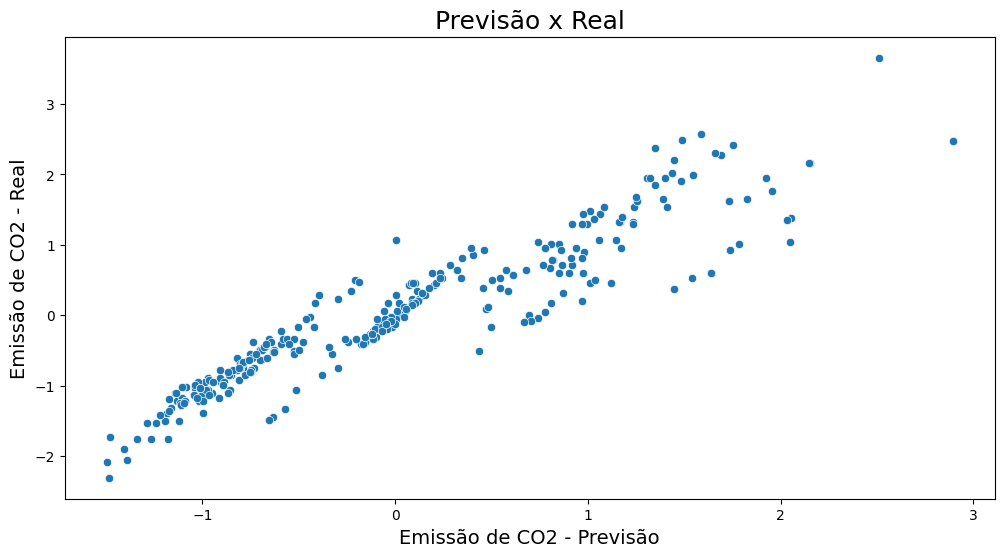

In [35]:
ax = sns.scatterplot(x=y_previsto, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Emissão de CO2 - Previsão', fontsize=14)
ax.set_ylabel('Emissão de CO2 - Real', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [36]:
X2 = dados[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE']]

## Criando os datasets de treino e de teste

In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [38]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [39]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [40]:
print('Modelo com Temp. Média')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temp. Média
R² = 0.86


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print('Modelo com Temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com Temp. Média
R² = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temp. Máxima
R² = 0.71


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE.

$$MSE(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{RMSE}$ mais baixo.

$$\sqrt{RMSE(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [ ]:
MSE_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,6060775.46
RMSE,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
MSE

5286453.26

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
RMSE

2299.23

In [ ]:
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,5286453.26
RMSE,2299.23
R²,0.71
